In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

In [3]:
con = sqlite3.connect('./zippedData/im.db')
cursor = con.cursor()

In [4]:
IMDB_tables_db = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)

In [5]:
movie_basics_df = pd.read_sql("""

SELECT *
FROM movie_basics

""", con)

In [6]:
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
movies = pd.read_csv("./zippedData/tmdb.movies.csv.gz")

In [8]:
movies.drop(columns = ['Unnamed: 0', 'original_language'], inplace = True)

In [9]:
movies = movies.sort_values('popularity', ascending = False)

In [10]:
combined_movies = movies.merge(movie_basics_df, how = 'inner', left_on = 'title', right_on = 'primary_title' )

In [11]:
combined_movies.drop(columns = ['genre_ids', 'original_title_x', 'movie_id', 'primary_title', 'original_title_y', 'start_year' ], inplace = True)

In [12]:
combined_movies['release_date'] = pd.to_datetime(combined_movies['release_date'])

In [13]:
combined_movies = combined_movies[(combined_movies['release_date'] > '2012-01-01') & (combined_movies['release_date'] < '2022-02-01')]

In [14]:
combined_movies['genres'] = combined_movies['genres'].str.split(',')

In [15]:
x_bar = combined_movies['genres'].value_counts().index[:10].tolist()

In [16]:
x_list = []
for i in x_bar: 
    x_list.append(str(i))
x_list.reverse()

In [17]:
(x_list[0]).strip("[]")

"'Drama', 'Thriller'"

In [18]:
final_x = []
for i in x_list:
    i = i.strip("[]")
    i = i.strip("''")
    i = i.strip( "',")
    final_x.append(i)
final_x

["Drama', 'Thriller",
 "Comedy', 'Drama', 'Romance",
 "Drama', 'Romance",
 "Horror', 'Thriller",
 'Thriller',
 "Comedy', 'Drama",
 'Comedy',
 'Horror',
 'Documentary',
 'Drama']

In [19]:
the_final_x = []
for i in final_x:
    i = i.strip("[]")
    i = i.strip("''")
    i = i.strip( "',")
    i = i.strip(',')
    the_final_x.append(i)
the_final_x

["Drama', 'Thriller",
 "Comedy', 'Drama', 'Romance",
 "Drama', 'Romance",
 "Horror', 'Thriller",
 'Thriller',
 "Comedy', 'Drama",
 'Comedy',
 'Horror',
 'Documentary',
 'Drama']

In [20]:
final_final = []
for i in the_final_x: 
    i = i.replace("', '", ' & ')
    final_final.append(i)
final_final

['Drama & Thriller',
 'Comedy & Drama & Romance',
 'Drama & Romance',
 'Horror & Thriller',
 'Thriller',
 'Comedy & Drama',
 'Comedy',
 'Horror',
 'Documentary',
 'Drama']

In [21]:
y_bar = list(combined_movies['genres'].value_counts()[:10])

In [22]:
y_bar

[2531, 1960, 826, 753, 645, 570, 508, 441, 408, 379]

In [23]:
y_list = []
for i in y_bar: 
    y_list.append(i)
y_list.reverse()

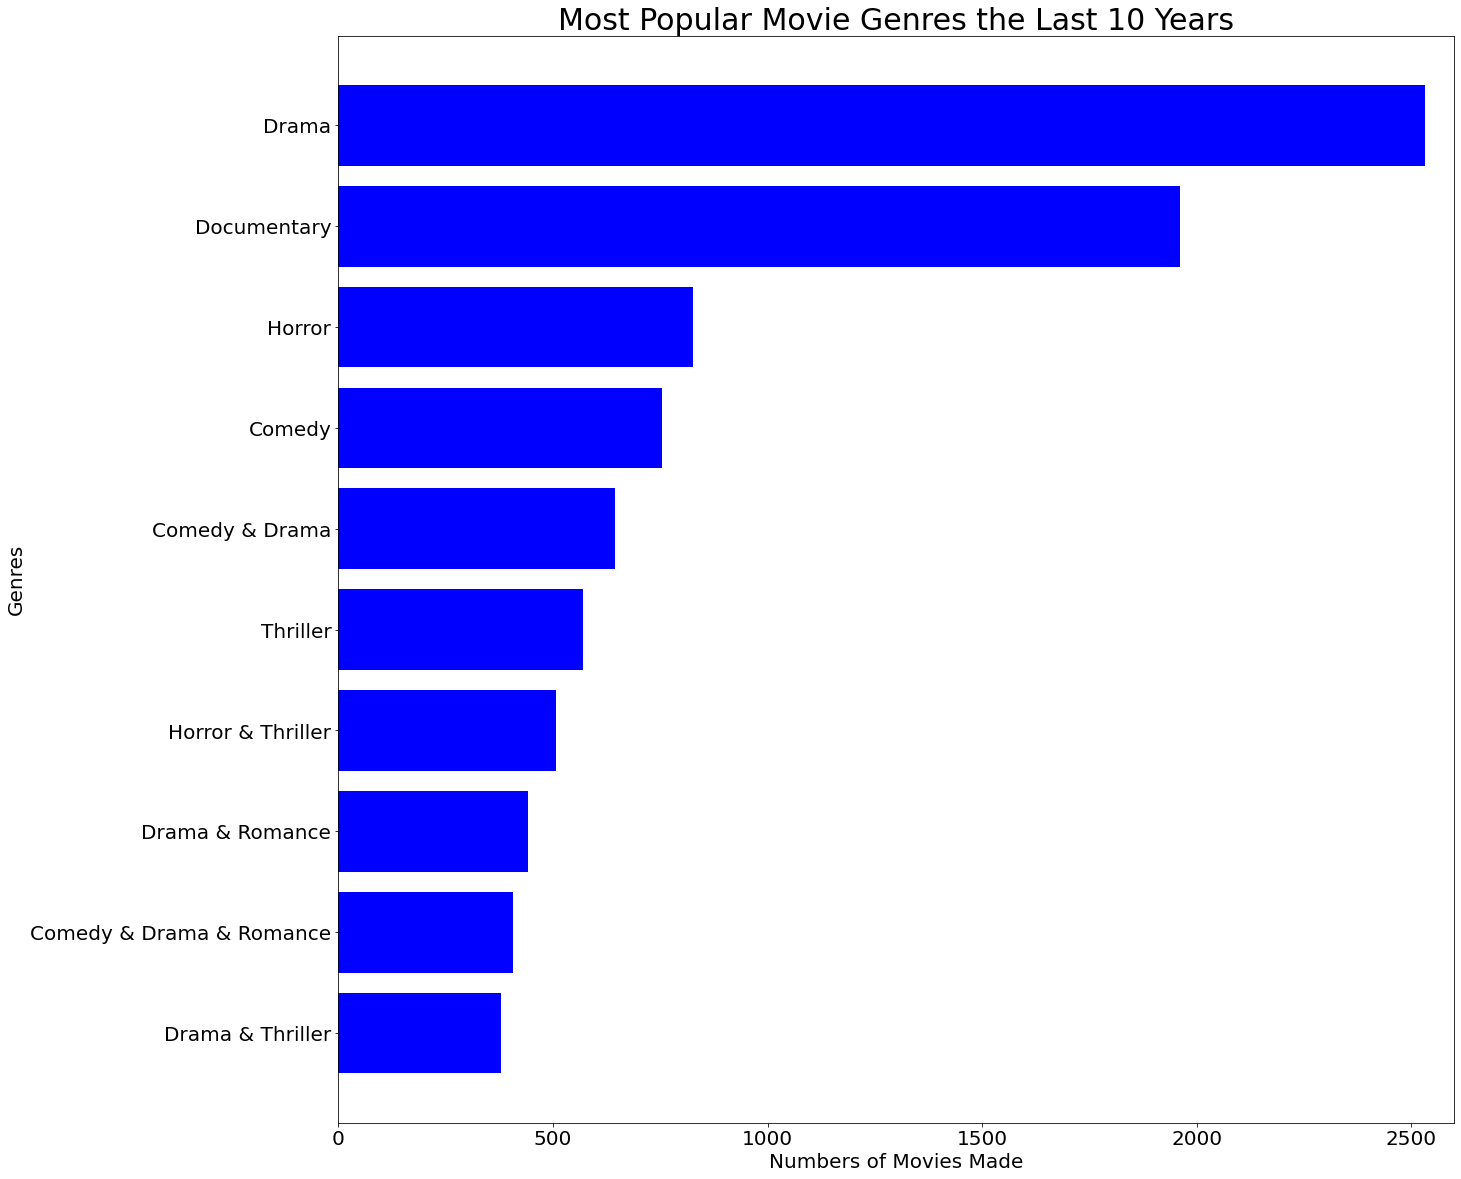

In [26]:
fig, ax = plt.subplots(figsize=(20,20))


plt.barh(width = y_list ,y = final_final, color = 'blue')

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)


plt.xlabel('Numbers of Movies Made', fontsize=20)
plt.ylabel('Genres', fontsize=20)
plt.xlim([0, 2600])
plt.title('Most Popular Movie Genres the Last 10 Years', fontsize = 30)

plt.savefig('./Images/kyongmin_bar_chart.png', bbox_inches='tight')


plt.show()

